# Corgi Classification with CNN's
### By Zachary Pulliam

This notebook can be used to perform images classification on images of Corgis to determine if they are Cardigans or Pembrokes. The notebook will do this by carrying out the following steps...

1. Load the Corgi dataset
2. Create a CNN
3. Train the CNN
4. Test the CNN

In [97]:
# Libraries needed

import torch

from torch import nn, optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

from cnn import CNN
from dataset import CorgiImages

In [98]:
# Paths to data

train_path = "...\\data\\training_data"
test_path = "...\\data\\testing_data"

In [99]:
# Create dataset and dataloader

trainset = CorgiImages(train_path)
testset = CorgiImages(test_path, test=True)

trainloader = DataLoader(trainset, batch_size=16, shuffle=True)
testloader = DataLoader(testset, batch_size=40, shuffle=True)

In [100]:
# Create model

model = CNN().to("cuda")
model

CNN(
  (layer1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.050000000000000044, inplace=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.050000000000000044, inplace=False)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.050000000000000044, inplace=False)
  )
  (fc1): Linear(in_features=41472, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=2, bias=True)
)

In [78]:
# Define paramerters

epochs = 200
lr = 0.01

In [79]:
# Train the model

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

avg_loss = []
for epoch in range(epochs):
    if epoch == 0 or (epoch + 1) % 50 == 0:
        print(f"Epoch: {epoch + 1} of {epochs}")
    
    running_loss = []

    for _, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels.squeeze())
        loss.backward()
        optimizer.step()

        running_loss.append(loss.item())

    if epoch == 0 or (epoch + 1) % 50 == 0:
        print(f"Average Loss: {round(sum(running_loss) / len(running_loss), 5)}\n")
        
    avg_loss.append(sum(running_loss) / len(running_loss))

Epoch: 1 of 200
Average Loss: 0.75331

Epoch: 50 of 200
Average Loss: 0.31974

Epoch: 100 of 200
Average Loss: 0.16304

Epoch: 150 of 200
Average Loss: 0.13681

Epoch: 200 of 200
Average Loss: 0.11996



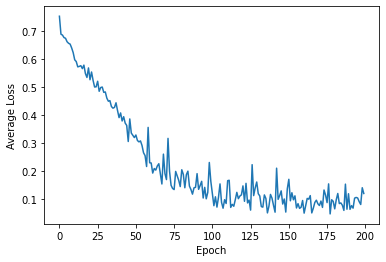

In [80]:
# Graph loss values

xs = [x for x in range(len(avg_loss))]

plt.plot(xs, avg_loss)
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.show()
plt.close()

In [95]:
# Test the model

correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()

        outputs = model(inputs)

        _, labels = torch.max(labels.squeeze().data, 1)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"\nAccuracy on {total} test images: {100 * correct // total} %\n")


Accuracy on 40 test images: 80 %

